In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
from utils import load_ds1
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

from sklearn.externals import joblib

In [2]:
!ls stockData/

AAPL.csv  BIIB.csv  CVS.csv   EOG.csv   INTC.csv  MRK.csv   PX.csv    TWX.csv
ABT.csv   BMY.csv   CVX.csv   EXC.csv   JNJ.csv   MS.csv    QCOM.csv  TXN.csv
AIG.csv   C.csv     DD.csv    F.csv     JPM.csv   MSFT.csv  SBUX.csv  UNH.csv
AMGN.csv  CAT.csv   DE.csv    GE.csv    KO.csv    NKE.csv   SLB.csv   UNP.csv
APA.csv   CELG.csv  DELL.csv  GILD.csv  LLY.csv   ORCL.csv  SO.csv    USB.csv
APC.csv   CL.csv    DHR.csv   HAL.csv   LOW.csv   OXY.csv   SP500.csv UTX.csv
AXP.csv   CMCSA.csv DIS.csv   HD.csv    MCD.csv   PEP.csv   SPG.csv   VZ.csv
BA.csv    COP.csv   DOW.csv   HON.csv   MDT.csv   PFE.csv   T.csv     WFC.csv
BAC.csv   COST.csv  EMC.csv   HPQ.csv   MMM.csv   PG.csv    TGT.csv   WMT.csv
BAX.csv   CSCO.csv  EMR.csv   IBM.csv   MO.csv    PNC.csv   TJX.csv   XOM.csv


In [3]:
data = load_ds1()

In [7]:
ds = data['F']
ds.X_train

DataSet(name='F', X_train=              lret-1    lret-2    lret-3    lret-4    lret-5    lret-6  \
1990-02-28 -0.002714  0.002721  0.027551  0.030348  0.016439  0.044451   
1990-03-01 -0.002721 -0.005435  0.000000  0.024830  0.027627  0.013718   
1990-03-02  0.026882  0.024161  0.021448  0.026882  0.051712  0.054509   
1990-03-05 -0.005319  0.021563  0.018842  0.016129  0.021563  0.046393   
1990-03-06  0.015874  0.010554  0.037437  0.034716  0.032002  0.037437   
1990-03-07 -0.010554  0.005319  0.000000  0.026882  0.024161  0.021448   
1990-03-08  0.010554  0.000000  0.015874  0.010554  0.037437  0.034716   
1990-03-09 -0.005263  0.005291 -0.005263  0.010610  0.005291  0.032174   
1990-03-12  0.013107  0.007843  0.018398  0.007843  0.023717  0.018398   
1990-03-13  0.002601  0.015707  0.010444  0.020999  0.010444  0.026318   
1990-03-14 -0.010444 -0.007843  0.005263  0.000000  0.010554  0.000000   
1990-03-15  0.005236 -0.005208 -0.002608  0.010499  0.005236  0.015790   
1990-03-16  

,lret-1,lret-2,lret-3,lret-4,lret-5,lret-6,lret-7,lret-8,lret-9,lret-10,...,lret-31,lret-32,lret-33,lret-34,lret-35,lret-36,lret-37,lret-38,lret-39,lret-40
2009-01-29,-0.040207,-0.010205,0.005141,0.080043,0.005141,-0.069335,-0.088293,-0.116073,-0.134173,-0.147536,...,-0.444029,-0.396882,-0.510826,-0.504653,-0.550047,-0.332803,-0.310497,-0.379490,-0.325423,-0.268264
2009-01-30,-0.041891,-0.082097,-0.052095,-0.036749,0.038152,-0.036749,-0.111226,-0.130183,-0.157963,-0.176063,...,-0.530943,-0.485919,-0.438772,-0.552716,-0.546543,-0.591937,-0.374693,-0.352388,-0.421380,-0.367313
2009-02-02,0.005333,-0.036557,-0.076764,-0.046762,-0.031416,0.043485,-0.031416,-0.105892,-0.124850,-0.152630,...,-0.509761,-0.525609,-0.480586,-0.433439,-0.547383,-0.541210,-0.586604,-0.369360,-0.347055,-0.416047
2009-02-03,0.041673,0.047006,0.005116,-0.035091,-0.005089,0.010257,0.085158,0.010257,-0.064220,-0.083177,...,-0.471278,-0.468088,-0.483937,-0.438913,-0.391766,-0.505710,-0.499537,-0.544931,-0.327687,-0.305382
2009-02-04,-0.005116,0.036557,0.041891,0.000000,-0.040207,-0.010205,0.005141,0.080043,0.005141,-0.069335,...,-0.375975,-0.476394,-0.473204,-0.489052,-0.444029,-0.396882,-0.510826,-0.504653,-0.550047,-0.332803


,target-1
2009-01-29,-0.041891
2009-01-30,0.005333
2009-02-02,0.041673
2009-02-03,-0.005116
2009-02-04,-0.010309


samples

NameError: name 'train' is not defined

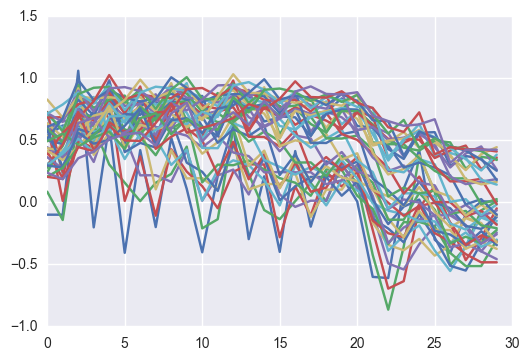

In [8]:
ds = data['F']

display(ds.X_train.tail())
display(ds.Y_train.tail())

# scale and normalise
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(ds.X_train)
X_dev_scaled = scaler.transform(ds.X_dev)
X_test_scaled = scaler.transform(ds.X_test)


# experimental y scaling.
yscaler = StandardScaler()
Y_train_scaled = yscaler.fit_transform(ds.Y_train)
Y_dev_scaled = yscaler.transform(ds.Y_dev).ravel()
Y_test_scaled = yscaler.transform(ds.Y_test).ravel()

plt.plot(X_train_scaled[:30])
print "samples", len(train)

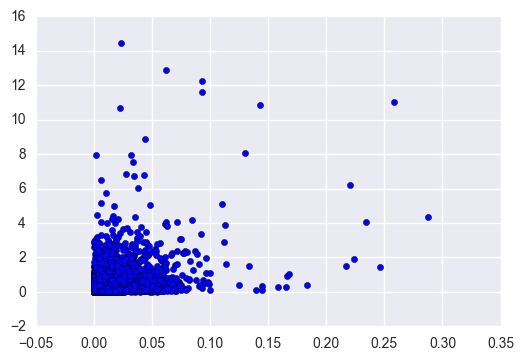

In [6]:
plt.scatter(X_train['lret-1'].abs(), np.abs(Y_train_scaled))

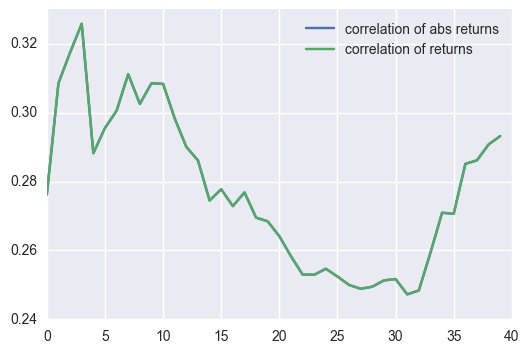

In [12]:
# report correlation between input and output features
FEATURE_COLS = ['lret-' + str(lb) for lb in FEATURE_LOOKBACKS]
TARGET_COLS = ['target-' + str(la) for la in TARGET_LOOKAHEADS]
c1 = pd.DataFrame(index=FEATURE_COLS, columns=TARGET_COLS)
c2 = pd.DataFrame(index=FEATURE_COLS, columns=TARGET_COLS)
for f in FEATURE_COLS:
    for t in TARGET_COLS:
        c1.ix[f][t] =  X_train[f].abs().corr(Y_train[t].abs())
        c2.ix[f][t] =  X_train[f].corr(Y_train[t])
        #print lb, la, X_train['lret-' + str(lb)].abs().corr(Y_train['target-' + str(la)].abs()), X_train['lret-' + str(lb)].corr(Y_train['target-' + str(la)])

#display("correlation of abs returns", c1)
#display("correlation of returns", c2)
#sns.heatmap(c1.astype(float))
#plt.show()
#sns.heatmap(c2.astype(float))

plt.plot(c1.values, label = 'correlation of abs returns')
plt.plot(c2.values, label = 'correlation of returns')
plt.legend()

In [8]:
# y = df['lret'].shift(-1).abs()
# corr = []
# ix = []
# for i in range(1,101):
#     name = 'mavol' + str(i)
#     df[name] = df['lret'].rolling(i).std() 
#     x = df[name]
#     #print  i, x.corr(y)
#     ix.append(i)
#     corr.append(x.corr(y))

# plt.plot(ix, corr)
# plt.show()


In [12]:
%%time

from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import expon as sp_expon
from sklearn.model_selection import TimeSeriesSplit

model = RandomForestRegressor()
param_dist = {"n_estimators": sp_randint(1,200),
              "max_depth": sp_randint(1,20),
             }

# model = SVR()
# param_dist = {'C': sp_expon(scale=100), 'gamma': sp_expon(scale=.1),
#   'kernel': ['rbf', 'linear']}


# run randomized search
n_iter_search = 100 # was 50
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, n_jobs=-1, cv=TimeSeriesSplit(n_splits=5))

random_search.fit(X_train_scaled, Y_train_scaled.ravel())
#random_search.fit(X_train_scaled, Y_train.values)


#model = MultiOutputRegressor(SVR())
# model = DecisionTreeRegressor(max_depth=5)

print random_search.score(X_train_scaled, Y_train_scaled)
print random_search.score(X_dev_scaled, Y_dev_scaled)



0.338381145203
0.00620687046683
CPU times: user 7.62 s, sys: 116 ms, total: 7.74 s
Wall time: 4min 31s


In [9]:
random_search = joblib.load('rand_searched_rfrefressor.pkl') 

TypeError: object pickle not returning list

In [14]:
from sklearn.metrics import r2_score
print "train r2 score", r2_score(Y_train, random_search.predict(X_train_scaled))
print "dev r2 score", r2_score(Y_dev, random_search.predict(X_dev_scaled))

print "train mse", mean_squared_error(Y_train_scaled, random_search.predict(X_train_scaled))
print "dev mse", mean_squared_error(Y_dev_scaled, random_search.predict(X_dev_scaled))


train r2 score -529.924470171
dev r2 score -1112.42889094
train mse 0.661618854797
dev mse 0.964755233965


In [ ]:
???? why is randomsearch.score(x,y) different to mse(y_train_scaled, randomsearch.predict(x_train_Scaled)) different????



In [15]:
joblib.dump(random_search, 'rand_searched_rfregressor.pkl')

['rand_searched_rfregressor.pkl']

In [16]:
print "X_train_scaled shape", X_train_scaled.shape
print "Y_train", Y_train.values.ravel().shape

X_train_scaled shape (4774, 40)
Y_train (4774,)


In [19]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import GaussianDropout
from keras.regularizers import l2, activity_l2

Using TensorFlow backend.


In [17]:
input_dims = len(FEATURE_COLS)

# create model
model = Sequential()
model.add(Dense(input_dims, input_dim=input_dims, init='he_normal', activation='relu'))
#model.add(GaussianDropout(0.1))
model.add(Dense(500, init='he_normal', activation='relu' ))
#model.add(GaussianDropout(0.1))
model.add(Dense(500, init='he_normal', activation='relu' ))
#model.add(GaussianDropout(0.1))
#model.add(Dense(100, init='normal', activation='relu' ))
#model.add(GaussianDropout(0.7))
model.add(Dense(1, init='he_normal'))
# Compile model
model.compile(loss='mse', optimizer='adam')

#model.fit(X_train_scaled, Y_train)

Using Theano backend.
Using gpu device 0: GeForce GTX 580 (CNMeM is disabled, cuDNN not available)


In [18]:
X_train_scaled_all = None
Y_train_all = None
X_dev_scaled_all = None
Y_dev_all = None

files = !ls stockData
for f in files:
    sym = f.split('.')[0]

    #print sym
    train, dev, test = split_dataset(load_stock_data(sym), 75,15,15)
    FEATURE_LOOKBACKS = np.arange(40)+1
    TARGET_LOOKAHEADS = [1]
    X_train, Y_train = create_features_and_targets(train, FEATURE_LOOKBACKS, TARGET_LOOKAHEADS)
    X_dev, Y_dev = create_features_and_targets(dev, FEATURE_LOOKBACKS, TARGET_LOOKAHEADS)

    # scale and normalise
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_dev_scaled = scaler.transform(X_dev)

    if X_train_scaled_all is None:
        X_train_scaled_all = X_train_scaled
        X_dev_scaled_all = X_dev_scaled
        Y_train_all = Y_train
        Y_dev_all = Y_dev
    else:
        X_train_scaled_all = np.concatenate( (X_train_scaled_all, X_train_scaled), axis=0)
        X_dev_scaled_all = np.concatenate( (X_dev_scaled_all, X_dev_scaled), axis=0)
        Y_train_all = np.concatenate( (Y_train_all, Y_train), axis=0)
        Y_dev_all = np.concatenate( (Y_dev_all, Y_dev), axis=0)

In [22]:
class MyCallback(keras.callbacks.Callback):
    dev_losses = []
    train_losses = []
    
    count = 0
    def on_epoch_end(self, epoch, logs):
        print epoch, logs['loss']
        self.count+=1
        if self.count %20 == 0:
            print epoch
            train_r2 = r2_score(Y_train_all, self.model.predict(X_train_scaled_all))
            dev_r2 = r2_score(Y_dev_all, self.model.predict(X_dev_scaled_all))
            train_mse = mean_squared_error(Y_train_all, self.model.predict(X_train_scaled_all))
            dev_mse = mean_squared_error(Y_dev_all, self.model.predict(X_dev_scaled_all))
            
            print "train_r2", train_r2
            print "dev_r2", dev_r2
            print "train_mse", train_mse
            print "dev_mse", dev_mse
            
            self.train_losses.append(train_mse)
            self.dev_losses.append(dev_mse)
            
                    

In [ ]:
progress = MyCallback()
hist = model.fit(X_train_scaled_all, Y_train_all, nb_epoch=2000, verbose=0, batch_size=150000, shuffle=True, callbacks=[progress])
plt.plot(hist.history['loss'])
print "train score", r2_score(Y_train_all, model.predict(X_train_scaled_all))
print "dev score", r2_score(Y_dev_all, model.predict(X_dev_scaled_all))

0 0.00898620561974
1 0.00887838521347
2 0.0087767686208
3 0.00867434784286
4 0.00856950539871
5 0.00847163761758
6 0.00838233231675
7 0.00829049495275
8 0.00820661994163
9 0.00810505590305
10 0.00801968436194
11 0.007933561445
12 0.007856746971
13 0.00777211609703
14 0.00770128781015
15 0.00762236171125
16 0.00755136432486
17 0.00748368111794
18 0.00741298955687
19 0.00734487315952
19
train_r2 -7.49698659733
dev_r2 -9.56659196703
train_mse 0.00732386105297
dev_mse 0.00562044484212
20 0.00728354468952
21 0.00721829047573
22 0.00715389582214
23 0.0070764394489
24 0.00701020016935
25 0.00695286800996
26 0.00689281803168
27 0.00684051287541
28 0.00678086272216
29 0.00672482444411
30 0.00667239584113
31 0.00663136361324
32 0.00661510134086
33 0.00652715866149
34 0.00647493833539
35 0.00642736008971
36 0.00640238515776
37 0.0063290664721
38 0.00627326491967
39 0.00622873712719
39
train_r2 -6.185415507
dev_r2 -7.95879960696
train_mse 0.00619337034115
dev_mse 0.00476524873863
40 0.006184246020

In [32]:
model.save('nn-500-500-no-dropout.h5')


In [22]:
model = keras.models.load_model('nn-500-500-no-dropout.h5')

ImportError: No module named h5py

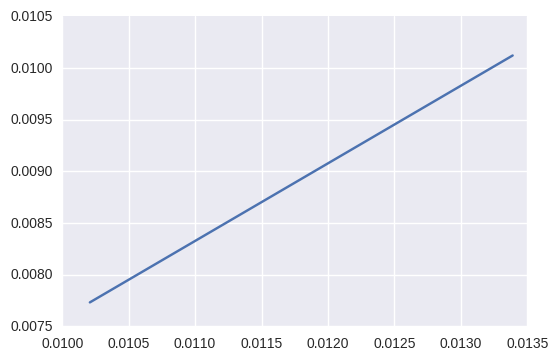

In [26]:
plt.plot(progress.train_losses, progress.dev_losses)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

train score 0.859745883661
dev score -44.5525355566
CPU times: user 11.5 s, sys: 33.8 s, total: 45.3 s
Wall time: 45.3 s


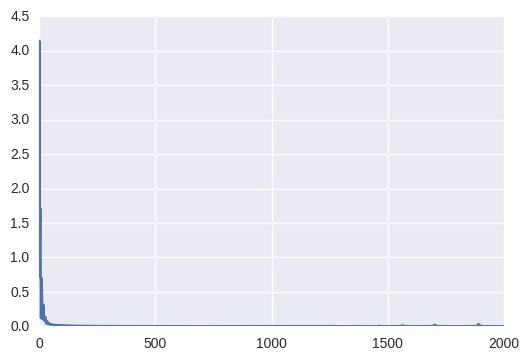

In [44]:
%%time 
hist = model.fit(X_train_scaled, Y_train.values.ravel(), nb_epoch=2000, verbose=0, batch_size=512000)
plt.plot(hist.history['loss'])
print "train score", r2_score(Y_train, model.predict(X_train_scaled))
print "dev score", r2_score(Y_dev, model.predict(X_dev_scaled))

In [35]:
print "train score", r2_score(Y_train, model.predict(X_train_scaled))
print "dev score", r2_score(Y_dev, model.predict(X_dev_scaled))
#print "dev corr", Y_dev.corr(model.predict(X_dev_scaled))
#?? args to corr



train score -20.5944312182
dev score -21.7767352819


In [47]:
print Y_dev.mean()
print np.sqrt(min(hist.history['loss']))

target-3    0.016593
dtype: float64
0.0664485472647


- for all stocks split to train, dev, test.
- compute range of 5*ma_cross signals.
- compute return for each
- summarise mean performance across the set. train / dev / test

- then train single model across all train. tune on dev.
- compare that model mean performance across all stocks.

** set up hold out set of stocks that aren't used for model development.